In [1]:
import pandas as pd

In [2]:
dt=pd.read_csv('raw_data.csv')

In [3]:
dt.head()


,timestamp,pitch,yaw,roll,lat,lon,alt,velocity_x,velocity_y,velocity_z,battery,heading,airspeed,groundspeed,label
0,0,0.033563,0.018168,-0.014827,36.715607,3.184630,17.85,-0.02,0.02,0.04,96,1,0.059137,0.040857,1
1,1,-0.041043,0.024321,0.119585,36.715608,3.184633,17.85,0.32,0.56,0.00,95,1,0.656489,0.656489,1
2,2,-0.234451,1.436555,-0.109804,36.715620,3.184656,17.81,1.53,2.38,-0.02,95,82,2.833855,2.833754,1
3,3,-0.145072,0.859095,0.007875,36.715647,3.184706,17.85,2.23,3.44,-0.04,95,49,4.107837,4.107615,1
4,4,0.005413,0.966991,0.027777,36.715682,3.184774,17.88,2.02,3.05,-0.02,94,55,3.661015,3.660955,1


In [5]:
dt.describe()

,timestamp,pitch,yaw,roll,lat,lon,alt,velocity_x,velocity_y,velocity_z,battery,heading,airspeed,groundspeed,label
count,247314.000000,247314.000000,247314.000000,247314.000000,247314.000000,247314.000000,247314.000000,247314.000000,247314.000000,247314.000000,247314.000000,247314.000000,247314.000000,247314.000000,247314.000000
mean,32.034123,-0.194884,-1.566042,0.005958,36.715037,3.182558,32.139558,-1.773934,-3.388136,0.000606,82.918444,222.754050,5.132464,4.945162,0.499770
std,18.782988,0.203086,1.405534,0.069195,0.000638,0.001353,14.935557,3.174759,3.382576,1.047282,7.520751,62.976233,3.313366,3.429535,0.500001
min,0.000000,-0.552157,-3.141522,-0.394041,36.713841,3.180571,10.030000,-5.590000,-8.350000,-1.650000,70.000000,0.000000,0.011411,0.000091,0.000000
25%,16.000000,-0.426378,-2.426363,-0.020646,36.714601,3.181555,20.190000,-4.260000,-6.590000,-0.350000,77.000000,218.000000,2.025592,1.391439,0.000000
50%,32.000000,-0.138217,-2.161856,0.003546,36.714876,3.181849,26.720000,-1.700000,-3.160000,0.000000,82.000000,235.000000,4.179299,4.178367,0.000000
75%,48.000000,-0.031491,-1.586176,0.027408,36.715642,3.184024,44.300000,-1.040000,-0.870000,1.080000,90.000000,239.000000,8.736177,8.685923,1.000000
max,66.000000,0.401961,3.141535,0.388063,36.716195,3.184886,70.000000,7.950000,4.740000,1.500000,98.000000,359.000000,10.168044,10.037191,1.000000


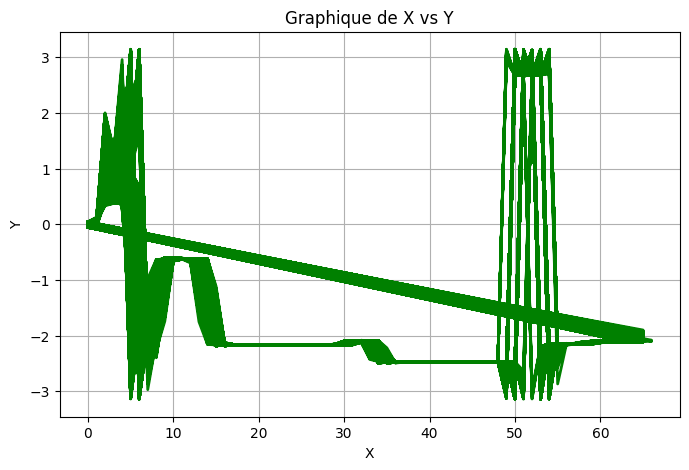

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(8, 5))
plt.plot(dt['timestamp'], dt['yaw'], color='green', linewidth=2)  # ligne + points
plt.title("Graphique de X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

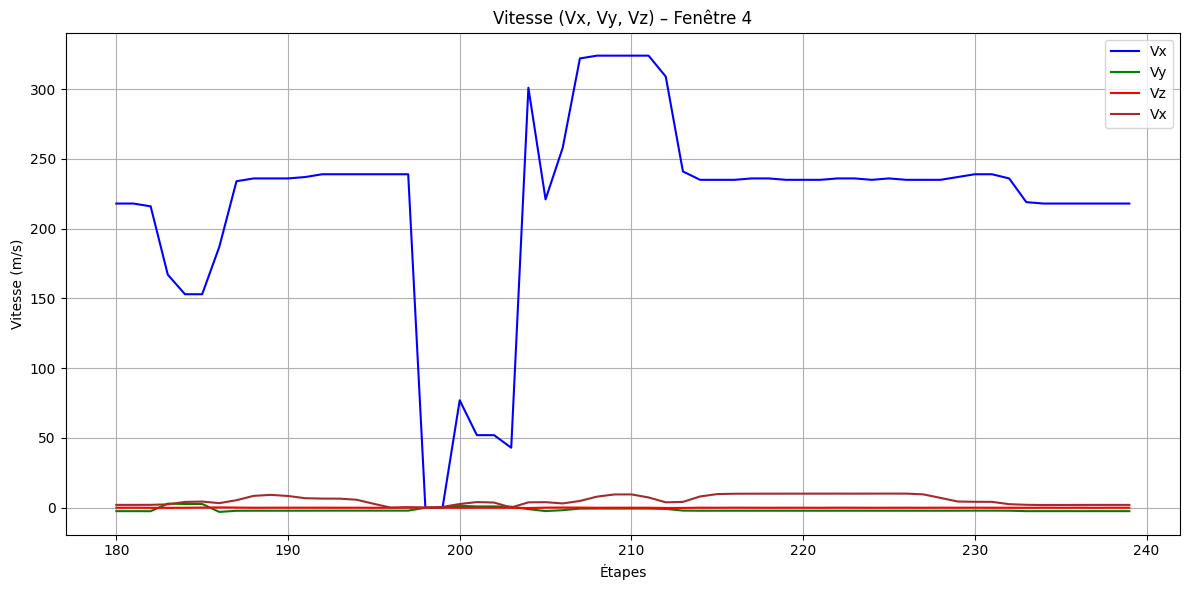

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

def visualiser_vitesse(csv_path, window_size=60, fenetre=0):
    """
    Affiche les courbes de vx, vy, vz sur une fenêtre donnée
    :param csv_path: chemin du fichier CSV
    :param window_size: nombre de steps par fenêtre
    :param fenetre: numéro de la fenêtre (0 = début)
    """
    try:
        # Charger les données
        df = pd.read_csv('raw_data.csv')

        # Vérifier que les colonnes existent
        for col in ['velocity_x', 'velocity_y', 'velocity_z']:
            if col not in df.columns:
                raise ValueError(f"Colonne manquante : {col}")

        # Calcul des bornes de la fenêtre
        start = fenetre * window_size
        end = start + window_size

        if end > len(df):
            raise ValueError("La fenêtre dépasse la taille du fichier.")

        # Extraire la fenêtre
        window = df.iloc[start:end]

        # Tracer les courbes
        plt.figure(figsize=(12, 6))
        plt.plot(window.index, window['heading'], label='Vx', color='blue')
        plt.plot(window.index, window['yaw'], label='Vy', color='green')
        plt.plot(window.index, window['roll'], label='Vz', color='red')
        plt.plot(window.index, window['airspeed'], label='Vx', color='brown')

        plt.title(f"Vitesse (Vx, Vy, Vz) – Fenêtre {fenetre+1}")
        plt.xlabel("Étapes")
        plt.ylabel("Vitesse (m/s)")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print("❌ Erreur :", e)

# Exemple d'utilisation
visualiser_vitesse("raw_data.csv", window_size=60, fenetre=3)


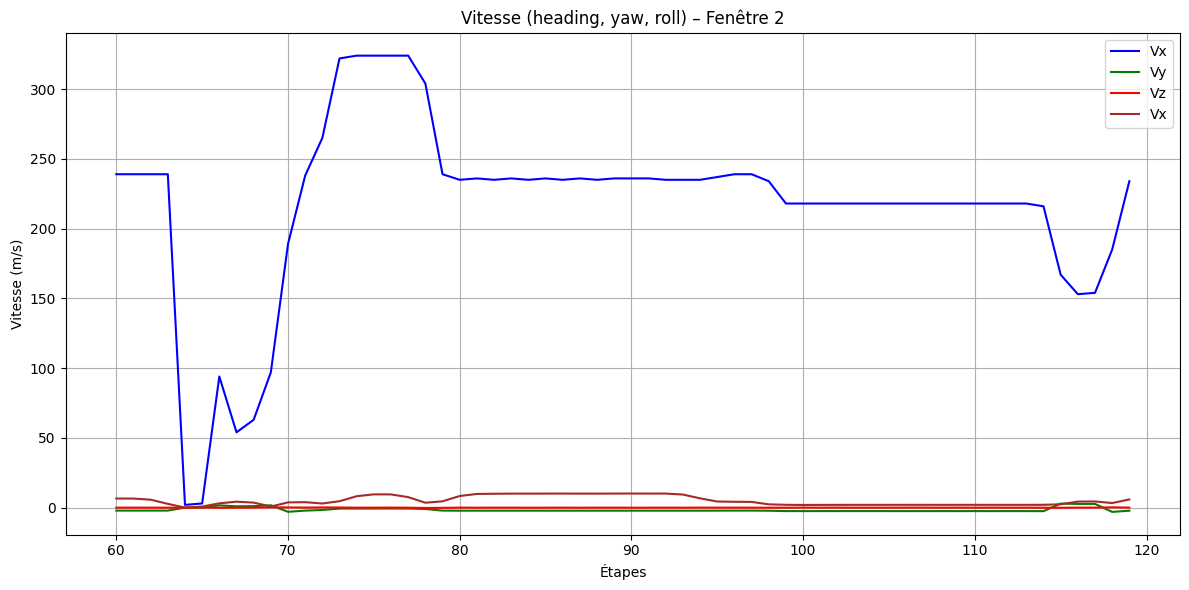

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

def visualiser_vitesse(csv_path, window_size=60, fenetre=0):
    """
    Affiche les courbes de vx, vy, vz sur une fenêtre donnée
    :param csv_path: chemin du fichier CSV
    :param window_size: nombre de steps par fenêtre
    :param fenetre: numéro de la fenêtre (0 = début)
    """
    try:
        # Charger les données
        df = pd.read_csv('false_missions.csv')

        # Vérifier que les colonnes existent
        for col in ['velocity_x', 'velocity_y', 'velocity_z']:
            if col not in df.columns:
                raise ValueError(f"Colonne manquante : {col}")

        # Calcul des bornes de la fenêtre
        start = fenetre * window_size
        end = start + window_size

        if end > len(df):
            raise ValueError("La fenêtre dépasse la taille du fichier.")

        # Extraire la fenêtre
        window = df.iloc[start:end]

        # Tracer les courbes
        plt.figure(figsize=(12, 6))
        plt.plot(window.index, window['heading'], label='Vx', color='blue')
        plt.plot(window.index, window['yaw'], label='Vy', color='green')
        plt.plot(window.index, window['roll'], label='Vz', color='red')
        plt.plot(window.index, window['airspeed'], label='Vx', color='brown')
        

        plt.title(f"Vitesse (heading, yaw, roll) – Fenêtre {fenetre+1}")
        plt.xlabel("Étapes")
        plt.ylabel("Vitesse (m/s)")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print("❌ Erreur :", e)

# Exemple d'utilisation§
visualiser_vitesse("raw_data.csv", window_size=60, fenetre=1)

In [19]:
df = pd.read_csv('data-1.csv')

In [21]:
df.shape

(65, 14)

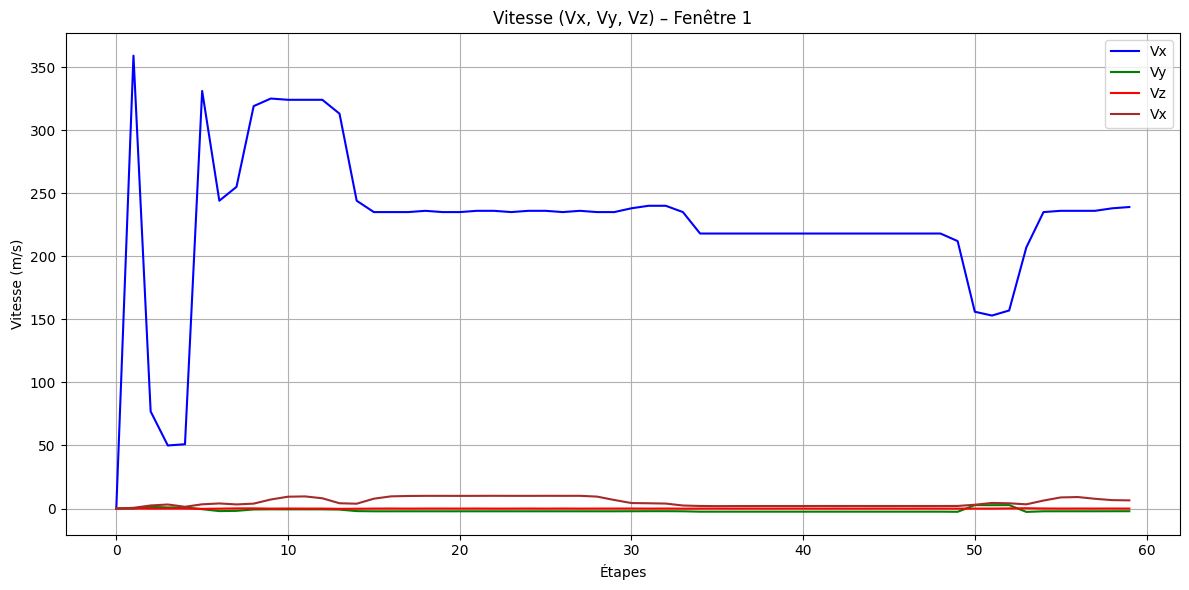

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

def visualiser_vitesse(csv_path, window_size=60, fenetre=1):
    """
    Affiche les courbes de vx, vy, vz sur une fenêtre donnée
    :param csv_path: chemin du fichier CSV
    :param window_size: nombre de steps par fenêtre
    :param fenetre: numéro de la fenêtre (0 = début)
    """
    try:
        # Charger les données
        df = pd.read_csv('data-1.csv')

        # Vérifier que les colonnes existent
        for col in ['velocity_x', 'velocity_y', 'velocity_z']:
            if col not in df.columns:
                raise ValueError(f"Colonne manquante : {col}")

        # Calcul des bornes de la fenêtre
        start = fenetre * window_size
        end = start + window_size

        if end > len(df):
            raise ValueError("La fenêtre dépasse la taille du fichier.")

        # Extraire la fenêtre
        window = df.iloc[start:end]

        # Tracer les courbes
        plt.figure(figsize=(12, 6))
        plt.plot(window.index, window['heading'], label='Vx', color='blue')
        plt.plot(window.index, window['yaw'], label='Vy', color='green')
        plt.plot(window.index, window['roll'], label='Vz', color='red')
        plt.plot(window.index, window['airspeed'], label='Vx', color='brown')

        plt.title(f"Vitesse (Vx, Vy, Vz) – Fenêtre {fenetre+1}")
        plt.xlabel("Étapes")
        plt.ylabel("Vitesse (m/s)")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print("❌ Erreur :", e)

# Exemple d'utilisation
visualiser_vitesse("raw_data.csv", window_size=60, fenetre=0)

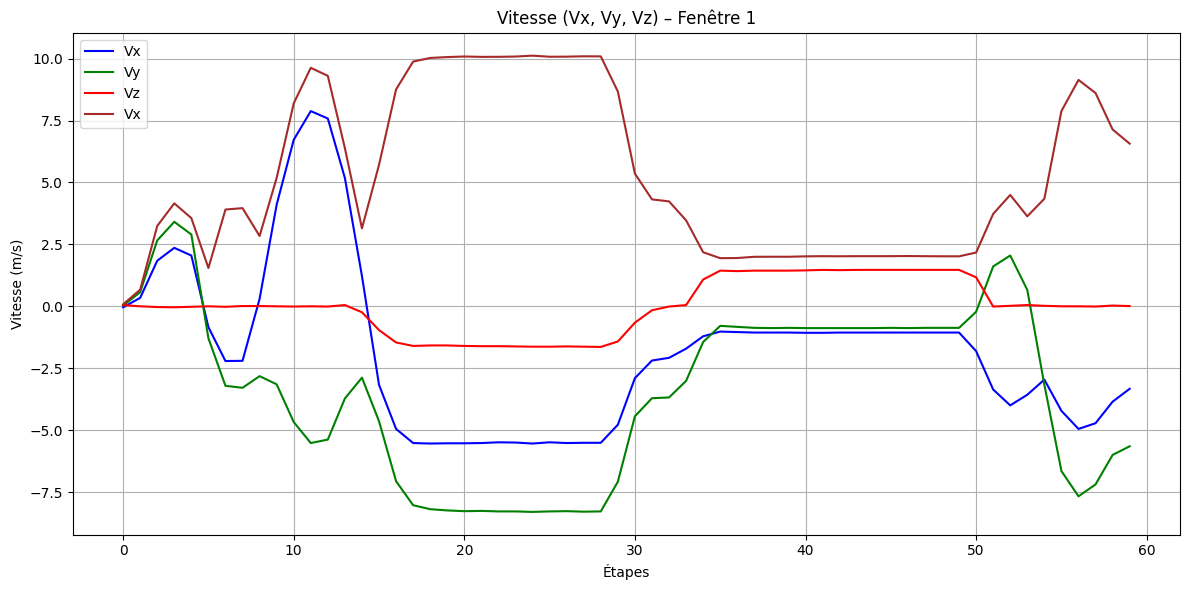

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def visualiser_vitesse(csv_path, window_size=60, fenetre=1):
    """
    Affiche les courbes de vx, vy, vz sur une fenêtre donnée
    :param csv_path: chemin du fichier CSV
    :param window_size: nombre de steps par fenêtre
    :param fenetre: numéro de la fenêtre (0 = début)
    """
    try:
        # Charger les données
        df = pd.read_csv('data_real.csv')

        # Vérifier que les colonnes existent
        for col in ['velocity_x', 'velocity_y', 'velocity_z']:
            if col not in df.columns:
                raise ValueError(f"Colonne manquante : {col}")

        # Calcul des bornes de la fenêtre
        start = fenetre * window_size
        end = start + window_size

        if end > len(df):
            raise ValueError("La fenêtre dépasse la taille du fichier.")

        # Extraire la fenêtre
        window = df.iloc[start:end]

        # Tracer les courbes
        plt.figure(figsize=(12, 6))
        plt.plot(window.index, window['velocity_x'], label='Vx', color='blue')
        plt.plot(window.index, window['velocity_y'], label='Vy', color='green')
        plt.plot(window.index, window['velocity_z'], label='Vz', color='red')
        plt.plot(window.index, window['airspeed'], label='Vx', color='brown')

        plt.title(f"Vitesse (Vx, Vy, Vz) – Fenêtre {fenetre+1}")
        plt.xlabel("Étapes")
        plt.ylabel("Vitesse (m/s)")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print("❌ Erreur :", e)

# Exemple d'utilisation
visualiser_vitesse("raw_data.csv", window_size=60, fenetre=0)